In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install keras-tuner --upgrade

     |████████████████████████████████| 133 kB 8.6 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from sklearn import preprocessing
%matplotlib inline
from scipy.signal import butter, lfilter, freqz
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from collections import Counter
from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import  Dense, LSTM, Dropout
from keras.layers import Flatten

#from keras.optimizers import SGD
#from keras.optimizers import Adam
from keras.regularizers import L1L2
import keras_tuner as kt
from keras import regularizers
#from tabgan.sampler import OriginalGenerator, GANGenerator
#import pandas.util.testing as tm

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Thesis_afra/Data/Thesis_data(afra+juhi+fari+sadi+nabila.csv")

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Thesis_afra/Data/Nabila_Final_Dataset_with_irrele.csv")


In [ ]:
#printing data properties
print("DF HEAD: ",df.head)
print("DF DTYPE: ",df.dtypes)
print("DF SHAPE: ",df.shape)
#checking null value
print("DF ISNULL: ",df.isnull().sum())

DF HEAD:  <bound method NDFrame.head of            Acc_X     Acc_Y     Acc_Z     Hr  Class
0       2.660984 -9.653030  0.470237  101.0      1
1       2.223091  2.223091  2.223091  101.0      1
2       2.098372 -9.481953  0.926070  101.0      1
3       2.716461 -9.739352  0.912008  101.0      1
4       2.288388 -9.371498  0.910390  101.0      1
...          ...       ...       ...    ...    ...
143237  8.491036  4.520851 -0.843358    0.0     21
143238  8.444350  4.558560 -0.855927    0.0     21
143239  8.466496  4.520253 -0.839168    0.0     21
143240  8.452730  4.530428 -0.863110    0.0     21
143241  8.434174  4.535217 -0.854730    0.0     21

[143242 rows x 5 columns]>
DF DTYPE:  Acc_X    float64
Acc_Y    float64
Acc_Z    float64
Hr       float64
Class      int64
dtype: object
DF SHAPE:  (143242, 5)
DF ISNULL:  Acc_X    0
Acc_Y    0
Acc_Z    0
Hr       2
Class    0
dtype: int64


In [ ]:
#dropping target column
X = df[["Acc_X","Acc_Y","Acc_Z"]]
#taking target column
y = df['Class']
#df.head

In [ ]:
#defining new dataframe
B = pd.DataFrame(columns=['Acc_X', 'Acc_Y', 'Acc_Z','Class'])
C = pd.DataFrame(columns=['Acc_X', 'Acc_Y', 'Acc_Z','Class'])
D = pd.DataFrame(columns=['Acc_X', 'Acc_Y', 'Acc_Z','Class'])

# outlier

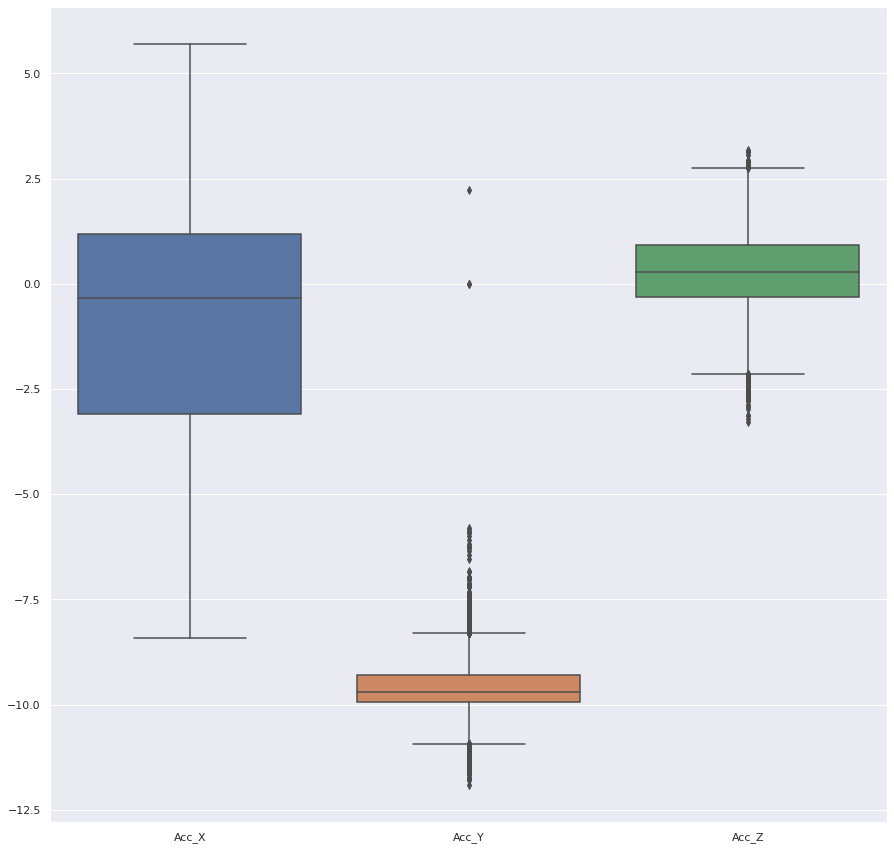

In [ ]:
#boxplot for data with outliers
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(15,15)})
fig= sns.boxplot(data=df.iloc[0:25955,0:3])
figure=fig.get_figure()
figure.savefig("withOutliers.png")
#df.head
#print(df.iloc[0,0:6])

In [ ]:
f=0
g=0
p=0

#finding first and last index of every class
ind=df.index.to_series().groupby(df['Class']).agg(['first','last']).reset_index()
print(ind)

    Class   first    last
0       1       0    7435
1       2    7436   15143
2       3   15144   23136
3       4   23137   31090
4       5   31091   38872
5       6   38873   46820
6       7   46821   53214
7       8   53215   59848
8       9   59849   66918
9      10   66919   73147
10     11   73148   79771
11     12   79772   86820
12     13   86821   93789
13     14   93790  101870
14     15  101871  104685
15     16  104686  112538
16     17  112539  120574
17     18  120575  124160
18     19  124161  131871
19     20  131872  139241
20     21  139242  143241


In [ ]:
#detecting and replacing outliers by mean
for m in range(1,21):
    A = df.loc[df['Class'] == m]
    print(A.shape)
    first=ind.iloc[p,1]
    print(first)
    last=ind.iloc[p,2]
    print(last)
    for i in range(0,2):
        #print("For i=i.value")
        Avg= np.mean(A.iloc[:,i])
        #print(Avg)
        Q1 = A.iloc[:,i].quantile(0.25)
        #print(Q1)
        Q3 = A.iloc[:,i].quantile(0.75)
        #print(Q3)
        IQR = Q3 - Q1
        lim1=(Q1 - 1.5 * IQR)
        #print(lim1)
        lim2=(Q3 + 1.5 * IQR)
        #print(lim2)
        #print(IQR)
        for ami in range(first,last+1):
            com=df.iloc[ami,i]
            if ((com < lim1) |(com > lim2)):
                #print(newdf.iloc[ami,i])
                df.iloc[ami,i] = Avg
                #print(Avg)
                #print(newdf.iloc[ami,i])
                f=f+1
                #C= A.replace(((A.iloc[ami,i] < (Q1 - 1.5 * IQR)) |(A.iloc[:,i] > (Q3 + 1.5 * IQR))), Avg)
        print(f)
    if(p<19):
        p=p+1

(7436, 5)
0
7435
0
83
(7708, 5)
7436
15143
83
130
(7993, 5)
15144
23136
130
403
(7954, 5)
23137
31090
659
2059
(7782, 5)
31091
38872
2059
2059
(7948, 5)
38873
46820
2059
2059
(6394, 5)
46821
53214
2064
2064
(6634, 5)
53215
59848
2952
2965
(7070, 5)
59849
66918
3386
3449
(6229, 5)
66919
73147
3527
3527
(6624, 5)
73148
79771
4153
4364
(7049, 5)
79772
86820
5528
5673
(6969, 5)
86821
93789
6112
6112
(8081, 5)
93790
101870
6112
6127
(2815, 5)
101871
104685
6827
7518
(7853, 5)
104686
112538
7518
7518
(8036, 5)
112539
120574
8666
8666
(3586, 5)
120575
124160
8671
8671
(7711, 5)
124161
131871
8671
8671
(7370, 5)
131872
139241
8800
8878


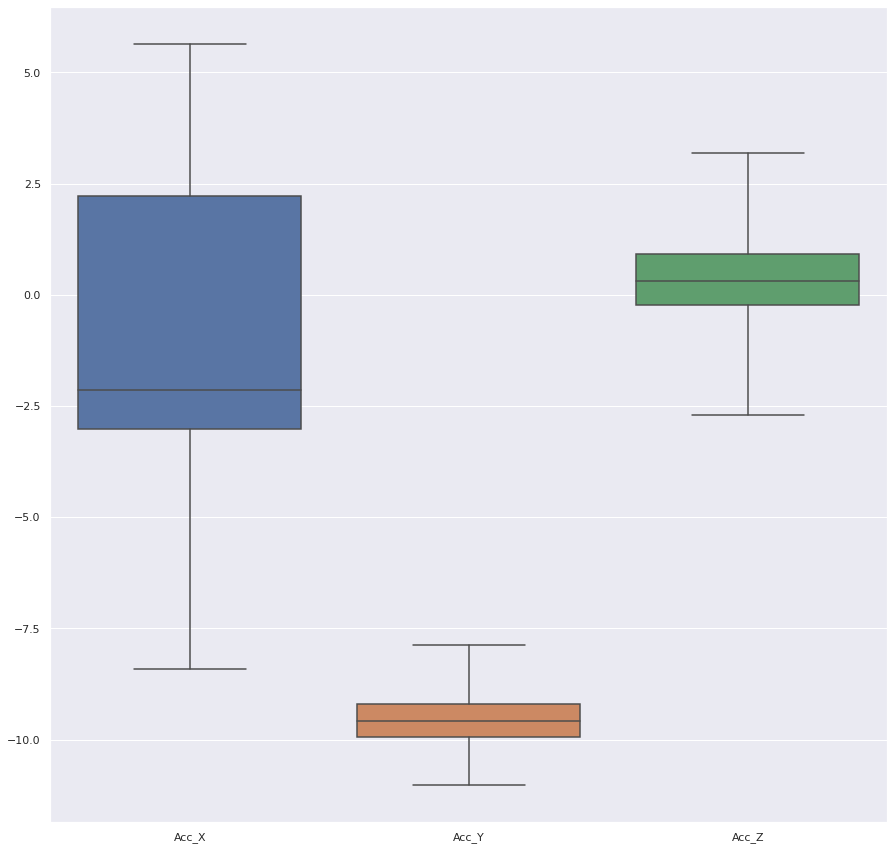

In [ ]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(15,15)})
fig=sns.boxplot(data=df.iloc[0:6000,0:3],whis=[0, 100])
count=0
figure=fig.get_figure()
figure.savefig("withOut_Outliers(Final Har_intensity).png")

In [ ]:
#defining function for low pass filter
def butter_lowpass(cutoff, fs, order):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order):
    b, a = butter_lowpass(cutoff, fs, order=order)
    print(b,a)
    y = lfilter(b, a, data)
    return y


p=0   

In [ ]:
#filtering data with low pass filter
for m in range(1,21):
    A = df.loc[df['Class'] == m]
    print(A.shape)
    first=ind.iloc[p,1]
    print(first)
    last=ind.iloc[p,2]
    print(last)
    for i in range(0,3):
        df.iloc[first:last+1,i]= butter_lowpass_filter(df.iloc[first:last+1,i], 10, 100, 10)
    if(p<19):
      p = p+1

(7436, 5)
0
7435
[1.68358141e-06 1.68358141e-05 7.57611633e-05 2.02029769e-04
 3.53552096e-04 4.24262515e-04 3.53552096e-04 2.02029769e-04
 7.57611633e-05 1.68358141e-05 1.68358141e-06] [ 1.00000000e+00 -5.98758963e+00  1.66721933e+01 -2.82587879e+01
  3.21597565e+01 -2.56017496e+01  1.44056874e+01 -5.64707434e+00
  1.47372794e+00 -2.30919346e-01  1.64796305e-02]
[1.68358141e-06 1.68358141e-05 7.57611633e-05 2.02029769e-04
 3.53552096e-04 4.24262515e-04 3.53552096e-04 2.02029769e-04
 7.57611633e-05 1.68358141e-05 1.68358141e-06] [ 1.00000000e+00 -5.98758963e+00  1.66721933e+01 -2.82587879e+01
  3.21597565e+01 -2.56017496e+01  1.44056874e+01 -5.64707434e+00
  1.47372794e+00 -2.30919346e-01  1.64796305e-02]
[1.68358141e-06 1.68358141e-05 7.57611633e-05 2.02029769e-04
 3.53552096e-04 4.24262515e-04 3.53552096e-04 2.02029769e-04
 7.57611633e-05 1.68358141e-05 1.68358141e-06] [ 1.00000000e+00 -5.98758963e+00  1.66721933e+01 -2.82587879e+01
  3.21597565e+01 -2.56017496e+01  1.44056874e+01 -5

In [ ]:
#taking filtered data into new dataframe
B=df

In [ ]:
#separating target column
X = B.drop('Class', axis=1)  
y = B['Class']

In [ ]:
#defining properties for LSTM
N_TIME_STEPS = 10
N_FEATURES = 3
step = 1
segments = []
labels = []

#segemting data
for i in range(0, len(B) - N_TIME_STEPS, step):
    accxs = B['Acc_X'].values[i: i + N_TIME_STEPS]
    accys = B['Acc_Y'].values[i: i + N_TIME_STEPS]
    acczs = B['Acc_Z'].values[i: i + N_TIME_STEPS]
    label = stats.mode(B['Class'][i: i + N_TIME_STEPS])[0][0]
    segments.append([accxs, accys, acczs]) # acczs,
    labels.append(label)
    
#print("SEGMENTS: ",segments)
#print("LABELS: ",labels)
print("SEGMENTS SHAPE: ",np.array(segments).shape)
print("LABELS SHAPE: ",np.array(labels).shape)
#pd.get_dummies(labels)  

SEGMENTS SHAPE:  (143232, 3, 10)
LABELS SHAPE:  (143232,)


In [ ]:
#shaping data into 3d
reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, N_TIME_STEPS, N_FEATURES)
labels = np.asarray(pd.get_dummies(labels), dtype = np.int64)

print("RESHAPE SHAPE: ",reshaped_segments.shape)
print("LABELS: ",labels[0])

RESHAPE SHAPE:  (143232, 10, 3)
LABELS:  [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
random_seed = 42   
n_time_steps = 1 
n_features = 4 
step = 1
n_classes = 20 
n_epochs = 50       
batch_size = 1024   
learning_rate = 0.0025
l2_loss = 0.0015

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(reshaped_segments, labels, test_size = 0.2, random_state = random_seed,stratify = labels)

In [ ]:
# Use the same function above for the validation set
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.20) # 0.25 x 0.8 = 0.2


print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))
print("X_val shape: {}".format(X_val.shape))
print("y val shape: {}".format(y_val.shape))

X_train shape: (91668, 10, 3)
X_test shape: (22917, 10, 3)
y_train shape: (91668, 21)
y_test shape: (22917, 21)
X_val shape: (28647, 10, 3)
y val shape: (28647, 21)


In [ ]:
# Initialising the LSTM
classifier = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
classifier.add(LSTM(units = 256, return_sequences = True, activation='tanh'))
#classifier.add(Dropout(0.1))

# Adding a second LSTM layer and some Dropout regularisation
classifier.add(LSTM(units = 128, return_sequences = True, activation='tanh'))
#classifier.add(Dropout(0.1))
classifier.add(Dropout(0.5))
# Adding a third LSTM layer and some Dropout regularisation
classifier.add(LSTM(units = 64, return_sequences = True, activation='relu'))
#classifier.add(Dropout(0.1))

# Adding a fourth LSTM layer and some Dropout regularisation
classifier.add(LSTM(units = 32, activation='tanh'))
#classifier.add(Dropout(0.1))

# Adding the output layer
classifier.add(Dense(units = 21, activation='softmax'))

# Compiling the LSTM
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = classifier.fit(X_train, y_train, epochs = 300, validation_split = 0.20, batch_size = 32, verbose = 1)

Epoch 1/300
2440/2440 [==============================] - 181s 71ms/step - loss: 1.1344 - accuracy: 0.6105 - val_loss: 0.7498 - val_accuracy: 0.7356
Epoch 2/300
2440/2440 [==============================] - 173s 71ms/step - loss: 0.7290 - accuracy: 0.7358 - val_loss: 0.6138 - val_accuracy: 0.7809
Epoch 3/300
2440/2440 [==============================] - 173s 71ms/step - loss: 0.6242 - accuracy: 0.7715 - val_loss: 0.5765 - val_accuracy: 0.7869
Epoch 4/300
2440/2440 [==============================] - 171s 70ms/step - loss: 0.5686 - accuracy: 0.7893 - val_loss: 0.5038 - val_accuracy: 0.8154
Epoch 5/300
2440/2440 [==============================] - 173s 71ms/step - loss: 0.5268 - accuracy: 0.8020 - val_loss: 0.4822 - val_accuracy: 0.8199
Epoch 6/300
2440/2440 [==============================] - 171s 70ms/step - loss: 0.4794 - accuracy: 0.8194 - val_loss: 0.4297 - val_accuracy: 0.8367
Epoch 7/300
2440/2440 [==============================] - 171s 70ms/step - loss: 0.4356 - accuracy: 0.8333 - val_

In [ ]:
  history = classifier.fit(X_train, y_train, epochs = 200, validation_split = 0.20, batch_size = 256, verbose = 1)

Epoch 1/200
305/305 [==============================] - 72s 214ms/step - loss: 1.5551 - accuracy: 0.5126 - val_loss: 0.9762 - val_accuracy: 0.6892
Epoch 2/200
305/305 [==============================] - 65s 213ms/step - loss: 0.9043 - accuracy: 0.6971 - val_loss: 0.7603 - val_accuracy: 0.7485
Epoch 3/200
305/305 [==============================] - 65s 212ms/step - loss: 0.7681 - accuracy: 0.7364 - val_loss: 0.6694 - val_accuracy: 0.7726
Epoch 4/200
305/305 [==============================] - 65s 212ms/step - loss: 0.6756 - accuracy: 0.7637 - val_loss: 0.6246 - val_accuracy: 0.7808
Epoch 5/200
305/305 [==============================] - 64s 209ms/step - loss: 0.6260 - accuracy: 0.7770 - val_loss: 0.5833 - val_accuracy: 0.7879
Epoch 6/200
305/305 [==============================] - 64s 210ms/step - loss: 0.5906 - accuracy: 0.7857 - val_loss: 0.5640 - val_accuracy: 0.7936
Epoch 7/200
305/305 [==============================] - 64s 210ms/step - loss: 0.5519 - accuracy: 0.7984 - val_loss: 0.4839 -

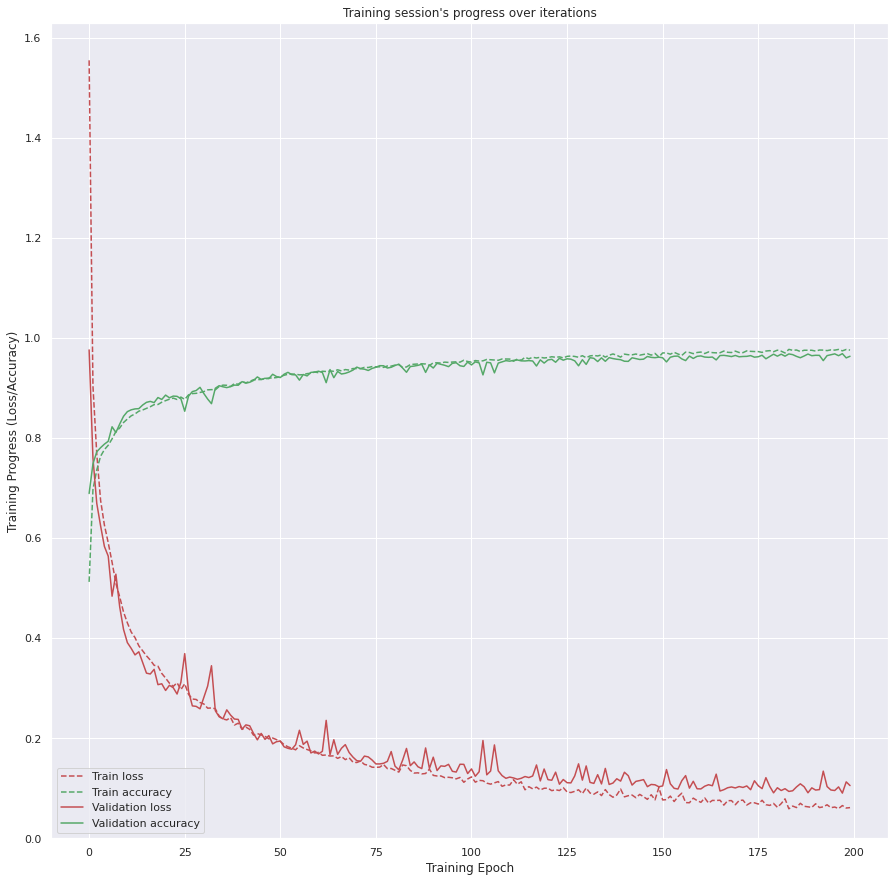

In [ ]:
plt.plot(np.array(history.history['loss']), "r--", label = "Train loss")
plt.plot(np.array(history.history['accuracy']), "g--", label = "Train accuracy")
plt.plot(np.array(history.history['val_loss']), "r-", label = "Validation loss")
plt.plot(np.array(history.history['val_accuracy']), "g-", label = "Validation accuracy")
plt.title("Training session's progress over iterations")
plt.legend(loc='lower left')
plt.ylabel('Training Progress (Loss/Accuracy)')
plt.xlabel('Training Epoch')
plt.ylim(0) 
plt.show()

In [ ]:
classifier.save("modelall95.h5")

In [ ]:
classifier.evaluate(X_test,y_test)

763/763 [==============================] - 13s 17ms/step - loss: 0.0939 - accuracy: 0.9669


[0.0939098447561264, 0.9669153690338135]

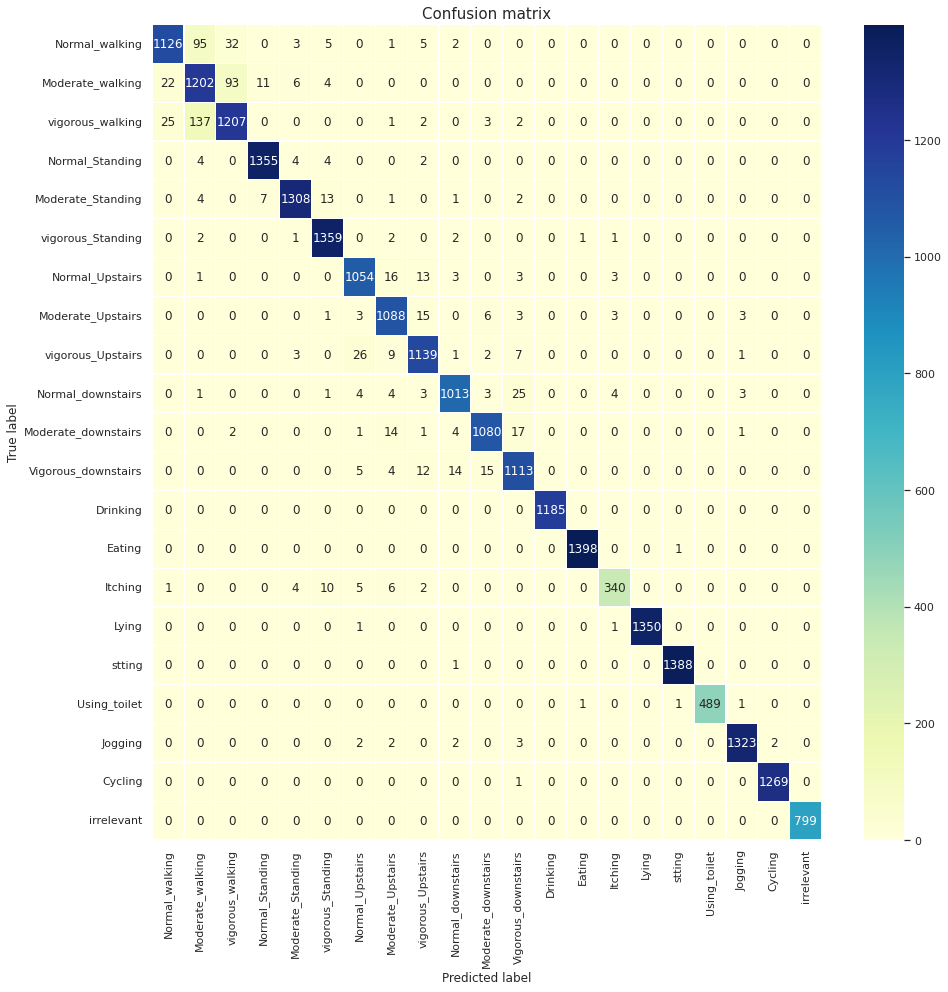

In [ ]:
predictions = classifier.predict(X_test)
class_labels = ["Normal_walking",'Moderate_walking','vigorous_walking',
                'Normal_Standing','Moderate_Standing','vigorous_Standing',
                'Normal_Upstairs','Moderate_Upstairs','vigorous_Upstairs',
                'Normal_downstairs','Moderate_downstairs','Vigorous_downstairs',
                'Drinking','Eating','Itching',"Lying","stting",
                "Using_toilet","Jogging","Cycling","irrelevant"]
max_test = np.argmax(y_test, axis=1)
max_predictions = np.argmax(predictions, axis=1)
confusion_matrix = metrics.confusion_matrix(max_test, max_predictions)
plt.figure(figsize=(15, 15))
sns.heatmap(confusion_matrix, xticklabels = class_labels, yticklabels = class_labels, annot = True, linewidths = 0.1, fmt='d', cmap = 'YlGnBu')
plt.title("Confusion matrix", fontsize = 15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig('confusion.png')
plt.show()

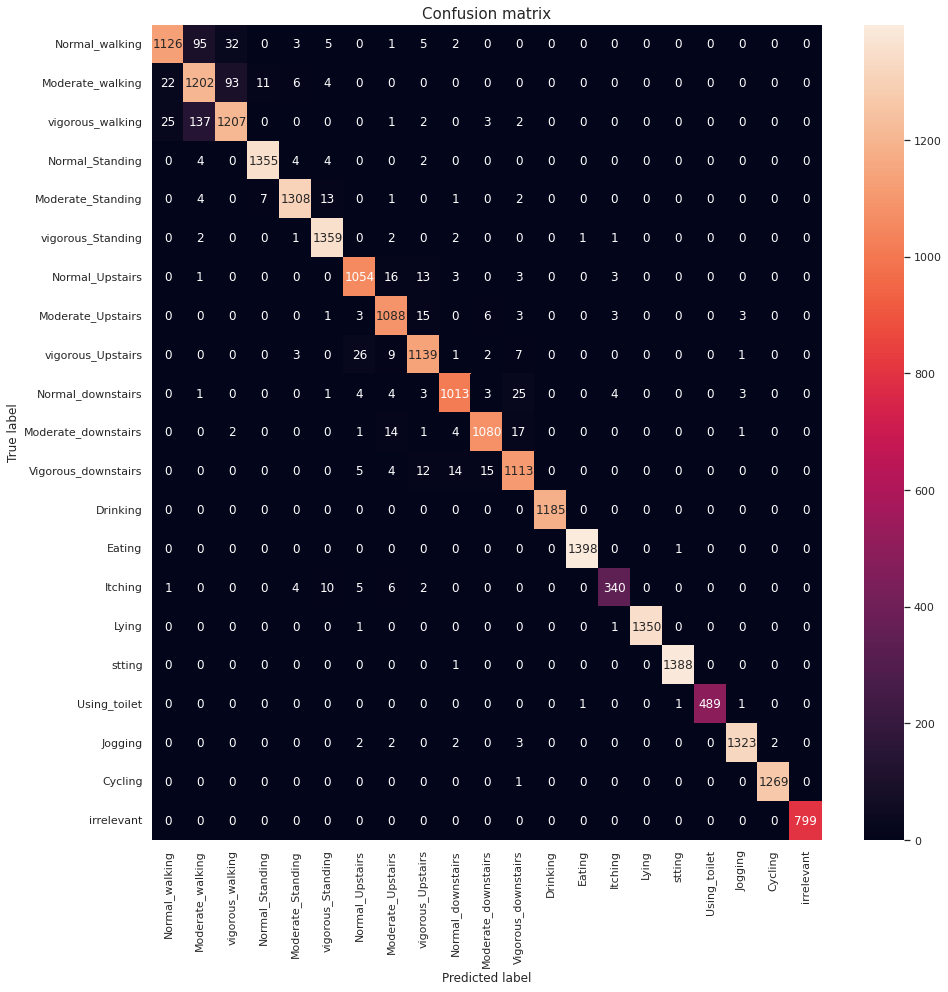

In [ ]:
predictions = classifier.predict(X_test)
class_labels = ["Normal_walking",'Moderate_walking','vigorous_walking',
                'Normal_Standing','Moderate_Standing','vigorous_Standing',
                'Normal_Upstairs','Moderate_Upstairs','vigorous_Upstairs',
                'Normal_downstairs','Moderate_downstairs','Vigorous_downstairs',
                'Drinking','Eating','Itching',"Lying","stting",
                "Using_toilet","Jogging","Cycling","irrelevant"]
max_test = np.argmax(y_test, axis=1)
max_predictions = np.argmax(predictions, axis=1)
confusion_matrix = metrics.confusion_matrix(max_test, max_predictions)
plt.figure(figsize=(15, 15))
sns.heatmap(confusion_matrix, xticklabels = class_labels, yticklabels = class_labels, annot = True, fmt='d')
plt.title("Confusion matrix", fontsize = 15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig('confusion.png')
plt.show()

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import  Dense, LSTM, Dropout

In [ ]:
# load model 

loaded_model=tf.keras.models.load_model("modelall95.h5")

In [ ]:
#tested on nabilas datasset
loaded_model.evaluate(X_test,y_test)

146/146 [==============================] - 9s 38ms/step - loss: 7.3300 - accuracy: 0.3514


[7.329955101013184, 0.3513861894607544]

# Train val Test

In [ ]:
history = classifier.fit(X_train, y_train, epochs = 200, batch_size = 256, verbose = 1,validation_data=(X_val,y_val))

Epoch 1/200
359/359 [==============================] - 95s 244ms/step - loss: 1.5549 - accuracy: 0.4823 - val_loss: 1.1495 - val_accuracy: 0.5725
Epoch 2/200
359/359 [==============================] - 91s 254ms/step - loss: 0.9722 - accuracy: 0.6616 - val_loss: 0.8218 - val_accuracy: 0.7233
Epoch 3/200
359/359 [==============================] - 87s 242ms/step - loss: 0.8304 - accuracy: 0.7098 - val_loss: 0.7471 - val_accuracy: 0.7389
Epoch 4/200
359/359 [==============================] - 86s 241ms/step - loss: 0.7283 - accuracy: 0.7453 - val_loss: 0.6964 - val_accuracy: 0.7457
Epoch 5/200
359/359 [==============================] - 87s 241ms/step - loss: 0.6543 - accuracy: 0.7676 - val_loss: 0.6849 - val_accuracy: 0.7414
Epoch 6/200
359/359 [==============================] - 86s 240ms/step - loss: 0.6093 - accuracy: 0.7811 - val_loss: 0.5514 - val_accuracy: 0.8002
Epoch 7/200
359/359 [==============================] - 86s 239ms/step - loss: 0.5552 - accuracy: 0.7975 - val_loss: 0.5171 -

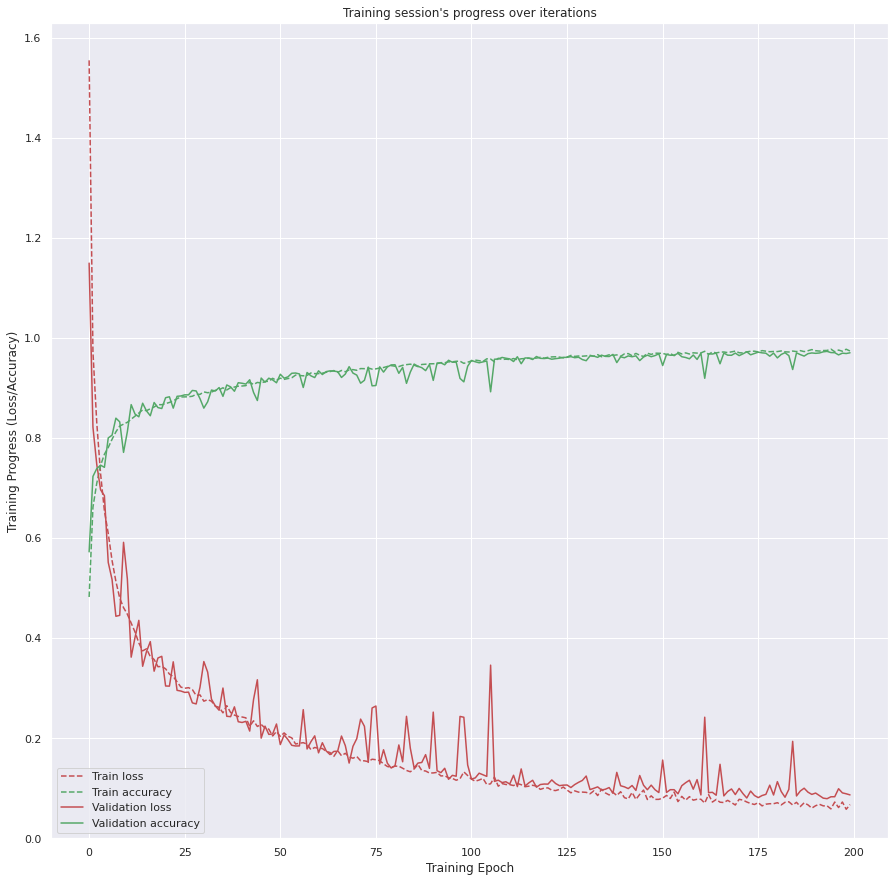

In [ ]:
plt.plot(np.array(history.history['loss']), "r--", label = "Train loss")
plt.plot(np.array(history.history['accuracy']), "g--", label = "Train accuracy")
plt.plot(np.array(history.history['val_loss']), "r-", label = "Validation loss")
plt.plot(np.array(history.history['val_accuracy']), "g-", label = "Validation accuracy")
plt.title("Training session's progress over iterations")
plt.legend(loc='lower left')
plt.ylabel('Training Progress (Loss/Accuracy)')
plt.xlabel('Training Epoch')
plt.ylim(0) 
plt.show()

In [ ]:
classifier.save("modelallFinal.h5")

In [ ]:
classifier.evaluate(X_test,y_test)

717/717 [==============================] - 14s 19ms/step - loss: 0.0877 - accuracy: 0.9713


[0.08770071715116501, 0.9712876677513123]

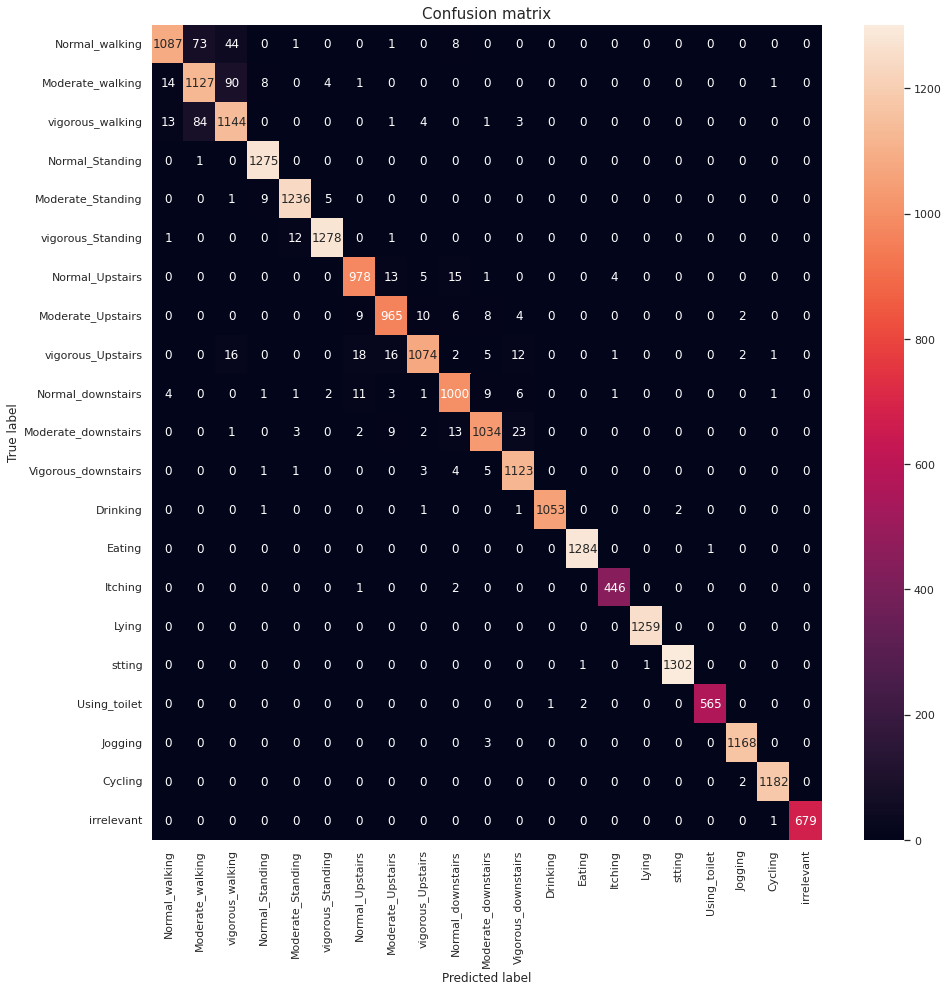

In [ ]:
predictions = classifier.predict(X_test)
class_labels = ["Normal_walking",'Moderate_walking','vigorous_walking',
                'Normal_Standing','Moderate_Standing','vigorous_Standing',
                'Normal_Upstairs','Moderate_Upstairs','vigorous_Upstairs',
                'Normal_downstairs','Moderate_downstairs','Vigorous_downstairs',
                'Drinking','Eating','Itching',"Lying","stting",
                "Using_toilet","Jogging","Cycling","irrelevant"]
max_test = np.argmax(y_test, axis=1)
max_predictions = np.argmax(predictions, axis=1)
confusion_matrix = metrics.confusion_matrix(max_test, max_predictions)
plt.figure(figsize=(15, 15))
sns.heatmap(confusion_matrix, xticklabels = class_labels, yticklabels = class_labels, annot = True, fmt='d')
plt.title("Confusion matrix", fontsize = 15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig('confusion.png')
plt.show()